# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [13]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/Musoloo/Data-Mining-Week-1_Benito-Priyasha/refs/heads/main/penguins_size.csv')
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [14]:
#2
df.info()

# Conclusion:
# The insights from this info include:
# 1. There are 344 rows and 7 columns in the dataset.
# 2. Some columns have missing values:
#    - 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g' have 342 non-null entries (2 missing values).
#    - The 'sex' column has 334 non-null entries (10 missing values).
# 3. The data types are a mix of categorical (object) and numerical (float64), which will need different handling for analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [15]:
#3
df.describe()

# Conclusion:
# The statistics show the range, mean, and variation for culmen length, culmen depth, flipper length, and body mass.
# It highlights that the dataset contains penguins with a wide range of body sizes and features.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [16]:
#4
print(df['species'].value_counts(dropna=False))
print(df['island'].value_counts(dropna=False))
print(df['sex'].value_counts(dropna=False))

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64




```
# This is formatted as code
```

5. Null handling

In [17]:
#5
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace=True)
df['sex'].fillna('Female',inplace=True)

<ipython-input-17-f911ff1a44c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace=True)
<ipython-input-17-f911ff1a44c3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

6. Create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-18-27fbcb7452f5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='culmen_length_mm', data=df, palette="Set3")


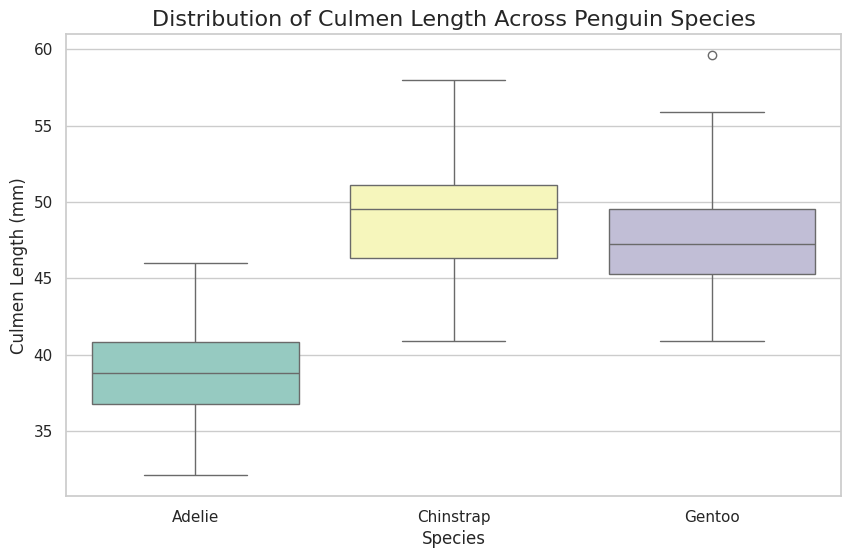

In [18]:
#6
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a boxplot to visualize the distribution of culmen length across species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='culmen_length_mm', data=df, palette="Set3")

# Add title and labels
plt.title('Distribution of Culmen Length Across Penguin Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Culmen Length (mm)', fontsize=12)

# Display the plot
plt.show()

# This visualization is a boxplot that shows the spread of culmen length for each penguin species. It helps identify differences in culmen length between species, showing median values and any potential outliers.

7. Check unique value of our target variable

In [19]:
#7
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

8. encode categorical columns and display the results

In [22]:
#8
label_encoder = LabelEncoder()

df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.sample(n = 5)

# Using label encoder to encode the categorical columns (island and sex)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
128,Adelie,2,39.0,17.1,191.0,3050.0,1
175,Chinstrap,1,50.6,19.4,193.0,3800.0,3
267,Gentoo,0,50.5,15.9,225.0,5400.0,3
142,Adelie,1,32.1,15.5,188.0,3050.0,1
90,Adelie,1,35.7,18.0,202.0,3550.0,1


9. encode the target column and display the results

In [23]:
#9
df['species'] = label_encoder.fit_transform(df['species'])

df.sample(n = 5)

# Using label encoder again to encode the target column which is the species column

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
267,2,0,50.5,15.9,225.0,5400.0,3
108,0,0,38.1,17.0,181.0,3175.0,1
50,0,0,39.6,17.7,186.0,3500.0,1
238,2,0,46.2,14.5,209.0,4800.0,1
302,2,0,47.4,14.6,212.0,4725.0,1


10. create a heatmap to see the correlation and explain the conclusion

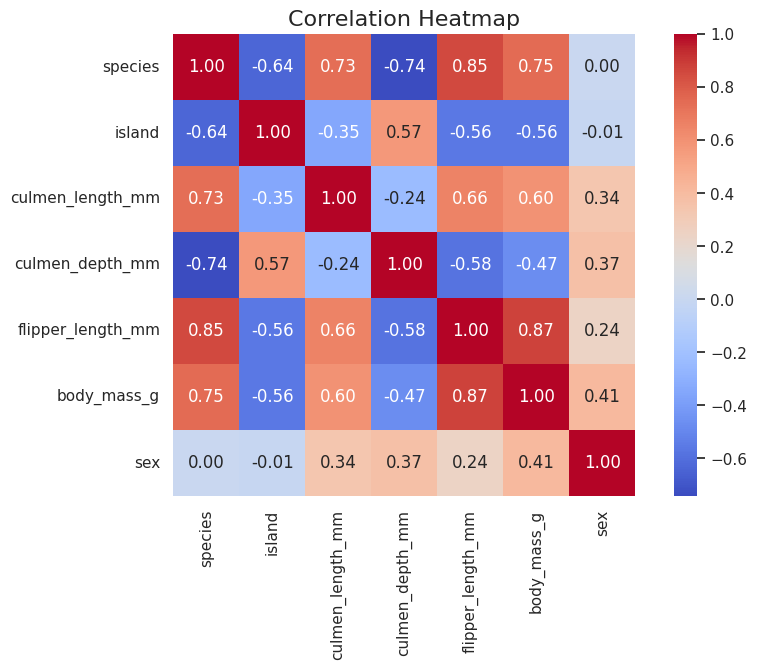

In [24]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# From the correlation heatmap, the most correlating entity to the species entity, is the flipper_length_mm, which is the length of the penguin's flipper.
# Then, the culmen length and body mass, also have a high positive correlation with the species.
# On the other hand, the island and culmen depth have a high negative correlation.
# Lastly, the gender have the lowest correlation, with suggests that it does not affect what the species of the penguin is.

## Machine Learning

1. Splitting X and y

In [25]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']

# X is the predicting variable, and y is the predicted variable

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [26]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Using train test split for data training and testing, test size is 0.2 or 20%, so the train size is 0.8 or 80%

In [27]:
#3
X_train.shape, X_test.shape

# The shape method is used to check how many rows and columns are associated with each train or test data.

((275, 6), (69, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [28]:
#Criterion Entropy
#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
#b
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.

In [30]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a high 92 percent accuracy.

Model accuracy score with criterion entropy: 0.9275


In [31]:
#d
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9275
Training accuracy: 0.9709


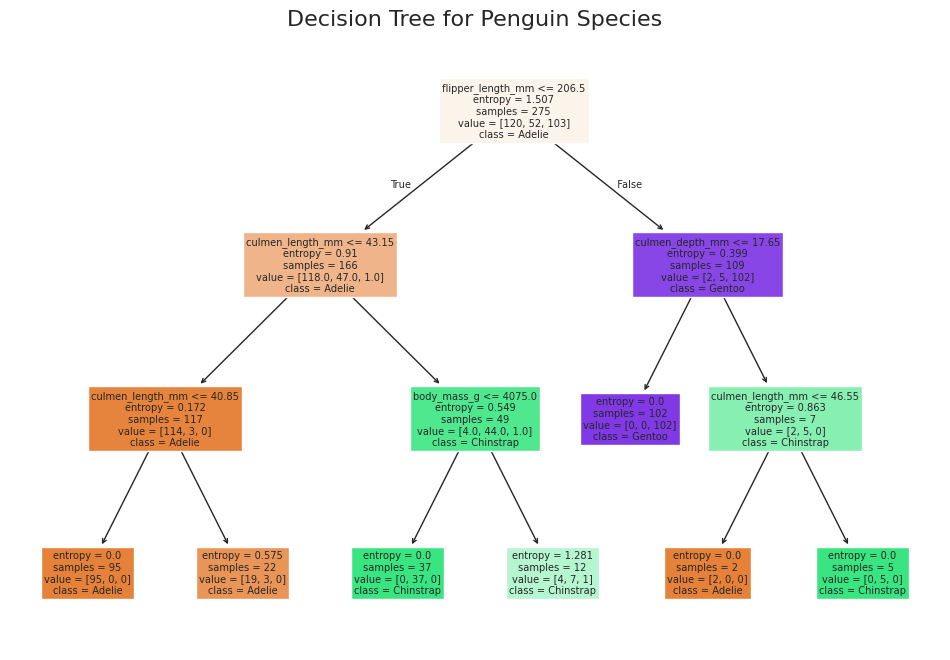

In [32]:
#e
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

2. Criterion Gini index

In [33]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.

In [35]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a high 92 percent accuracy.

Model accuracy score with criterion gini: 0.9275


In [36]:
#d
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9275
Training accuracy: 0.9709


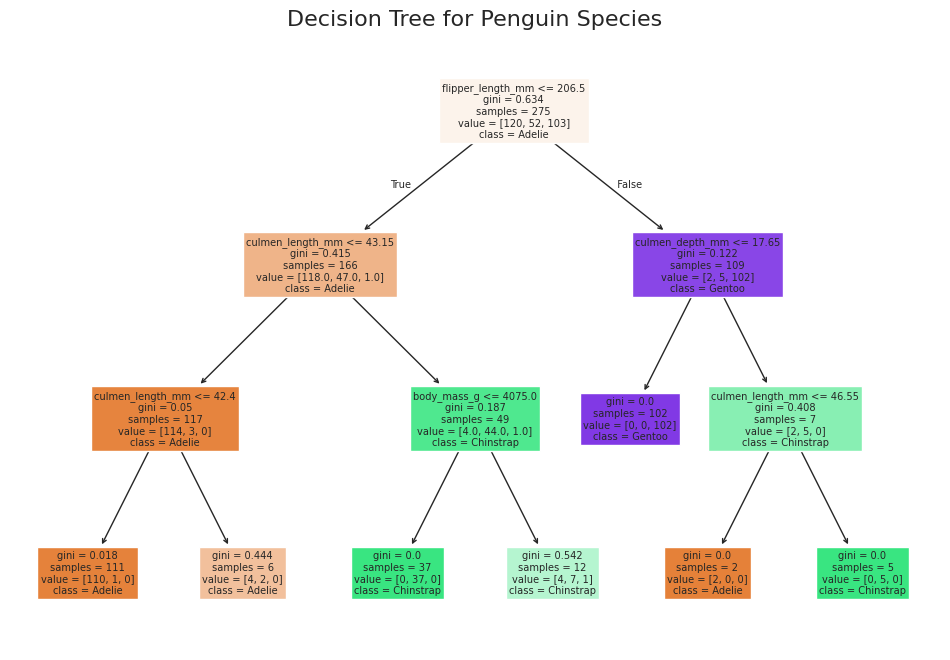

In [37]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)
plt.show()


# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [38]:
#f
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]
Confusion Matrix Gini Index:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [39]:
#g
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)

# Printing the classification report both Criterion Entropy and Criterion Gini.

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [40]:
#h

# Results
# Both the Decision Tree models using Entropy and Gini Index as splitting criteria demonstrate strong performance in classifying penguin species, achieving an overall accuracy of 93%.
# The precision, recall, and F1-scores for each class are comparable across both models, indicating that both approaches effectively handle the dataset.
# Notably, class 2 (which is the Gentoo species) shows perfect precision and high recall, suggesting it is easily distinguishable from the others.
# However, while both models perform well, attention should be given to class 1, which exhibits a lower precision, indicating a higher chance of misclassification.

# Conclusion
# Performance Metrics: Both models produce identical precision, recall, and F1-scores across all classes, suggesting they have similar predictive capabilities.
# Model Preference: Given that the Entropy and Gini Index models yield the same performance metrics, the choice between them may depend on interpretability and computational efficiency.
# Gini Index is generally faster in computation compared to Entropy, making it preferable in scenarios where model training time is a consideration.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [41]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [42]:
#b
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [43]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

# Printing both accuracy score and confusion matrix of the Naive Bayes Classifier model, showing a high 97% accuracy.

Model accuracy score: 0.9710
Confusion Matrix:
 [[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [44]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

# Classification report of the Naive Bayes Classifier, showing the precision, recall, f1-score, and support values of the model.

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [45]:
#f

# Result
# The model exhibits exceptional performance in classifying penguin species, achieving an overall accuracy of 97%.
# It demonstrates high precision and recall across all classes, with a perfect recall of 1.00 for class 2, indicating effective identification of true instances.
# The consistently high F1-scores further confirm the model's reliability in minimizing misclassifications.

# Conclusion
# Overall, this model is excellent for practical applications in species identification and ecological studies.
# To ensure the model's ongoing effectiveness, it's crucial to perform regular cross-validation and monitor its performance with new data.
# Additionally, analyzing feature importance and exploring other algorithms could provide further insights and improvements.

Good Luck :)